# sustainability_topic_modeling

In [4]:
'''
This file creates NLP functions using the NLP Pipeline for TF-IDF and Count Vectorizer comparisons.

LDA, LSA or NMF can be selected as model inputs.

Model is currently set to run using NMF.

Outputs include:  
Topics derived in topic modeling (incl. total vocab word & frequency count)
KMeans Silhouette Score Plot
TSNE Plot

Clusters saved to new pickle file 
'''

'\nThis file creates NLP functions using the NLP Pipeline for TF-IDF and Count Vectorizer comparisons.\n\nLDA, LSA or NMF can be selected as model inputs.\n\nModel is currently set to run using NMF.\n\nOutputs include:  \nTopics derived in topic modeling (incl. total vocab word & frequency count)\nKMeans Silhouette Score Plot\nTSNE Plot\n\nClusters saved to new pickle file \n'

In [5]:
#Load in nlp pipeline

#import sustainability_nlp_pipeline
from sustainability_nlp_pipeline import nlp_pipeline as nlp_func
from sustainability_nlp_pipeline import cleaned_text

In [6]:
#Load in other packages

import re
import pandas as pd
import pickle
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD

In [7]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Connect to MongoDB

from pymongo import MongoClient
client = MongoClient()
db = client.environment
sustainability_collection = db.sustainability

Define Stop Words:

In [9]:
stop_words = stopwords.words('english')

#Add additional stop words in here:

additional_stop_words = ['RT', 'rt', "’", "retweet", "sustainability", "sustainable", "sustainabl", "sustain"]

total_stop_words = stop_words + additional_stop_words

**Define Parameters to use in NLP Function**

In [10]:
#TF-IDF

nlp_tfidf = nlp_func(vectorizer=TfidfVectorizer(min_df=2, max_df=0.5, stop_words = total_stop_words), 
                     cleaning_function=cleaned_text, tokenizer=TreebankWordTokenizer().tokenize)#, stemmer=PorterStemmer())

In [11]:
english_cursor = sustainability_collection.aggregate([{'$match': {'lang': 'en'}}])#{'$sample':{'size':5}}
generate_text = (x['text'] for x in english_cursor)
nlp_tfidf.fit_vectorizer(generate_text)

In [12]:
english_cursor = sustainability_collection.aggregate([{'$match': {'lang': 'en'}}])#{'$sample':{'size':5}}
generate_text = (x['text'] for x in english_cursor)
tfidf_tweet = nlp_tfidf.transform_vectorizer(generate_text)
#tfidf_tweet.toarray()

In [13]:
#Look at words (vector columns) using TFIDF

nlp_tfidf.vectorizer.get_feature_names()

['aaa',
 'aaj',
 'aapgeducation',
 'aarhus',
 'ab',
 'abetz',
 'abilities',
 'ability',
 'able',
 'ablebodied',
 'abo',
 'abolition',
 'abou',
 'absolute',
 'absolutely',
 'abstract',
 'abundant',
 'abused',
 'abuzz',
 'ac',
 'academic',
 'academics',
 'academy',
 'acc',
 'acceleration',
 'accelerator',
 'accepting',
 'access',
 'accessible',
 'accessing',
 'accidentsincluding',
 'accommodation',
 'according',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'ach',
 'achievable',
 'achieve',
 'achieved',
 'achievemen',
 'achievement',
 'achieves',
 'achieving',
 'acidity',
 'acknowledge',
 'acquire',
 'acquires',
 'acquisition',
 'acre',
 'across',
 'act',
 'acting',
 'action',
 'actionable',
 'actiononclimate',
 'actions',
 'actively',
 'activism',
 'activist',
 'activists',
 'activities',
 'activity',
 'actonclimate',
 'actor',
 'actually',
 'acu',
 'ad',
 'adam',
 'adams',
 'adapt',
 'adaptation',
 'adaptive',
 'adapts',
 'add',
 

In [14]:
#Count Vectorizer

nlp_cv = nlp_func(vectorizer=CountVectorizer(max_df=0.5, stop_words = total_stop_words), cleaning_function=cleaned_text, tokenizer=TreebankWordTokenizer().tokenize)#, stemmer=PorterStemmer())

In [15]:
english_cursor = sustainability_collection.aggregate([{'$match': {'lang': 'en'}}])#{'$sample':{'size':5}}
generate_text = (x['text'] for x in english_cursor)
nlp_cv.fit_vectorizer(generate_text)

In [16]:
english_cursor = sustainability_collection.aggregate([{'$match': {'lang': 'en'}}])#{'$sample':{'size':5}}
generate_text = (x['text'] for x in english_cursor)
cv_tweet = nlp_cv.transform_vectorizer(generate_text)
#cv_tweet.toarray()

In [17]:
#Look at words (vector columns) using Count Vectorizer

nlp_cv.vectorizer.get_feature_names()

['aaa',
 'aaj',
 'aapgeducation',
 'aarey',
 'aarhus',
 'ab',
 'aba',
 'abandoned',
 'abandons',
 'abb',
 'abc',
 'abdullah',
 'abetterbackpack',
 'abetz',
 'abhor',
 'abilities',
 'ability',
 'able',
 'ablebodied',
 'abnormally',
 'abo',
 'abolition',
 'abolt',
 'abou',
 'abp',
 'abroad',
 'absolute',
 'absolutely',
 'abstract',
 'abt',
 'abudh',
 'abudhabi',
 'abuja',
 'abundant',
 'abused',
 'abuzz',
 'ac',
 'acade',
 'academia',
 'academic',
 'academics',
 'academy',
 'acc',
 'accelerate',
 'acceleration',
 'accelerator',
 'accent',
 'accepting',
 'acces',
 'access',
 'accessible',
 'accessing',
 'accessoires',
 'accesstoenergy',
 'accidentally',
 'accidentsincluding',
 'accolade',
 'accommodation',
 'accommodations',
 'accomplishing',
 'accor',
 'according',
 'accorhotels',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accounts',
 'accredited',
 'accuracy',
 'accurate',
 'accuse',
 'accusecharge',
 'accused',
 'ace',
 'ach',
 'achievable',
 'achieve',
 'achieved'

**Models**

In [18]:
#Define Models

n_comp = 20

lda_cv_model = LatentDirichletAllocation(n_topics=20,
                                max_iter=10,
                                random_state=42,
                               learning_method='online')
lda_tfidf_model = LatentDirichletAllocation(n_topics=20,
                                max_iter=10,
                                random_state=42,
                               learning_method='online')
lsa_cv_model = TruncatedSVD(n_components=n_comp)
lsa_tfidf_model = TruncatedSVD(n_components=n_comp)
nmf_cv_model = NMF(n_components=n_comp)
nmf_tfidf_model = NMF(n_components=n_comp)

Fit / Transform Models

In [19]:
lda_cv_data = lda_cv_model.fit_transform(cv_tweet)
lda_tfidf_data = lda_tfidf_model.fit_transform(tfidf_tweet)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [20]:
lsa_cv_data = lsa_cv_model.fit_transform(cv_tweet)
lsa_tfidf_data = lsa_tfidf_model.fit_transform(tfidf_tweet)

In [21]:
nmf_cv_data = nmf_cv_model.fit_transform(cv_tweet)
nmf_tfidf_data = nmf_tfidf_model.fit_transform(tfidf_tweet)

In [22]:
#Save this vectorized data for later:

with open ('vectorized_tfidfdata.pickle', 'wb') as to_write:
    pickle.dump(nmf_tfidf_data, to_write)

Display Topics

In [22]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [57]:
#LDA, Count Vectorizer:

#display_topics(lda_cv_model,nlp_cv.vectorizer.get_feature_names(),10)

In [58]:
#LDA, TFIDF:

#display_topics(lda_tfidf_model,nlp_tfidf.vectorizer.get_feature_names(),10)

In [59]:
#LSA, Count Vectorizer:

#display_topics(lsa_cv_model,nlp_cv.vectorizer.get_feature_names(),10)

In [60]:
#LSA, TFIDF:

#display_topics(lsa_tfidf_model,nlp_tfidf.vectorizer.get_feature_names(),10)

In [61]:
#NMF, Count Vectorizer:

#display_topics(nmf_cv_model,nlp_cv.vectorizer.get_feature_names(),10)

In [28]:
#NMF, TFIDF:

display_topics(nmf_tfidf_model,nlp_tfidf.vectorizer.get_feature_names(),10)


Topic  0
drones, fly, license, pilot, car, need, drone, navigation, rin, credit

Topic  1
components, cybersecurity, smartcity, machinelearning, needed, build, bigdata, industry, iot, infose

Topic  2
mathematical, elite, techie, limited, massive, mining, shift, crypto, awareness, know

Topic  3
plastics, climatechange, waste, plastic, circulareco, tackle, problem, reuse, else, world

Topic  4
latest, thanks, daily, csr, news, green, environment, solar, opening, technology

Topic  5
skylights, costs, solarenergy, unique, cc, reduce, tech, energy, greentech, plast

Topic  6
enzyme, breaks, discovered, changing, game, scientists, plasticfree, days, te, innovation

Topic  7
countries, work, ai, robots, put, top, futureofwork, automation, iiot, ir

Topic  8
meet, marketing, inspired, multicultural, think, currentstate, satisfied, client, another, htt

Topic  9
techgood, ecology, environment, mashable, biofabricated, animalrights, leather, would, buy, world

Topic  10
land, food, ecosystem

In [62]:
#print("Count Vectorized Words and Frequency: \n",nlp_cv.vectorizer.vocabulary_)

In [63]:
#print("TFIDF Words and Frequency: \n",nlp_tfidf.vectorizer.vocabulary_)

Topic Modeling graph using py LDA vis

In [31]:
#Look at how this changes as I move number of topics

import pyLDAvis, pyLDAvis.sklearn
from IPython.display import display

pyLDAvis.enable_notebook()

vis = pyLDAvis.sklearn.prepare(lda_cv_model, cv_tweet, nlp_cv.vectorizer)

display(vis)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15    -0.050061 -0.282783       1        1  7.021015
18     0.052813 -0.192653       2        1  6.460038
11     0.257828  0.088712       3        1  6.367869
3      0.275353  0.042727       4        1  6.270481
10    -0.000092 -0.125546       5        1  5.783282
1     -0.005903 -0.025771       6        1  5.777891
16    -0.003633 -0.049976       7        1  5.064882
0     -0.100774  0.060993       8        1  4.831427
17    -0.090962 -0.007105       9        1  4.819530
12    -0.020987 -0.098000      10        1  4.762686
4     -0.071820  0.066693      11        1  4.715550
7      0.047765 -0.061829      12        1  4.698196
2     -0.063762  0.065002      13        1  4.639010
13     0.002600  0.049893      14        1  4.543395
8      0.122732  0.049305      15        1  4.471282
6     -0.064514  0.071573      16        1  4.263789
19    -0.066564  0.076105      17        1  4.222953
5     -0.066172  0.077050      18        1  3.887167
9     -0.081278  0.096104      19        1  3.722155
14    -0.072569  0.099506      20        1  3.677403, topic_info=      Category        Freq           Term       Total  loglift  logprob
term                                                                   
380    Default  651.000000            amp  651.000000  30.0000  30.0000
4508   Default  373.000000          green  373.000000  29.0000  29.0000
6862   Default  354.000000           need  354.000000  28.0000  28.0000
7686   Default  524.000000        plastic  524.000000  27.0000  27.0000
4501   Default  416.000000          great  416.000000  26.0000  26.0000
5850   Default  351.000000         latest  351.000000  25.0000  25.0000
11292  Default  337.000000          world  337.000000  24.0000  24.0000
3417   Default  391.000000    environment  391.000000  23.0000  23.0000
11025  Default  349.000000          waste  349.000000  22.0000  22.0000
1804   Default  279.000000  climatechange  279.000000  21.0000  21.0000
6909   Default  446.000000            new  446.000000  20.0000  20.0000
5257   Default  268.000000       industry  268.000000  19.0000  19.0000
9436   Default  247.000000          solar  247.000000  18.0000  18.0000
4014   Default  279.000000           food  279.000000  17.0000  17.0000
10886  Default  288.000000            via  288.000000  16.0000  16.0000
11045  Default  228.000000          water  228.000000  15.0000  15.0000
10214  Default  291.000000         thanks  291.000000  14.0000  14.0000
5735   Default  245.000000           know  245.000000  13.0000  13.0000
5579   Default  210.000000            job  210.000000  12.0000  12.0000
9033   Default  318.000000            see  318.000000  11.0000  11.0000
1798   Default  211.000000        climate  211.000000  10.0000  10.0000
3338   Default  552.000000         energy  552.000000   9.0000   9.0000
10777  Default  203.000000            use  203.000000   8.0000   8.0000
4325   Default  180.000000            get  180.000000   7.0000   7.0000
4809   Default  227.000000           help  227.000000   6.0000   6.0000
6233   Default  233.000000           make  233.000000   5.0000   5.0000
10996  Default  255.000000           want  255.000000   4.0000   4.0000
4372   Default  178.000000         global  178.000000   3.0000   3.0000
1610   Default  176.000000         change  176.000000   2.0000   2.0000
11272  Default  300.000000           work  300.000000   1.0000   1.0000
...        ...         ...            ...         ...      ...      ...
6105   Topic20   94.176059           look   95.024175   3.2940  -3.6220
4996   Topic20   79.226727             ht   80.074886   3.2923  -3.7949
1520   Topic20   75.624829             cc   76.472945   3.2918  -3.8414
9325   Topic20   48.623858      skylights   49.472111   3.2857  -4.2831
7891   Topic20   38.336598      predicted   39.184723   3.2811  -4.5208
8152   Topic20   37.647005        purpose   38.495122  

**Cluster on Topics**

NMF

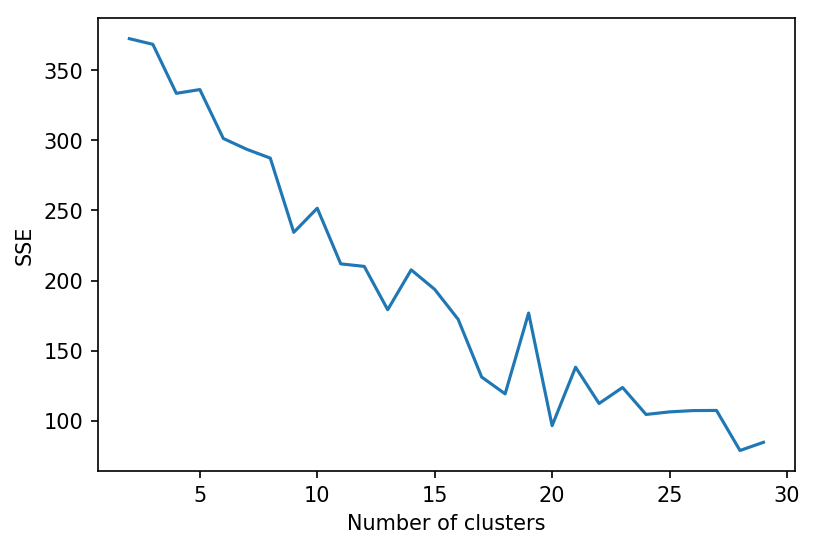

In [32]:
#Count Vectorizer

SSE = []

for k in range(2,30):
    km = MiniBatchKMeans(n_clusters = k, random_state = 42)
    km.fit(nmf_cv_data)
    labels = km.labels_
    SSE.append(km.inertia_)
    
plt.figure(dpi = 150)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.plot(range(2,30),SSE);
#plt.ylim((0,600))

plt.savefig("cluster_plot_cv")

In [43]:
km = MiniBatchKMeans(n_clusters=16, random_state = 4444)
nmf_clusters = km.fit_predict(nmf_cv_data)

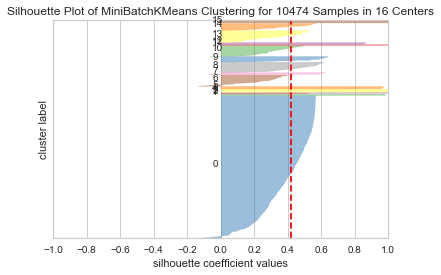

In [26]:
visualiser = SilhouetteVisualizer(MiniBatchKMeans(n_clusters=16), random_state = 4444)
visualiser.fit(nmf_cv_data)
visualiser.poof()

In [45]:
model = TSNE(n_components=2, random_state = 0, verbose = 0)
low_data = model.fit_transform(nmf_cv_data)

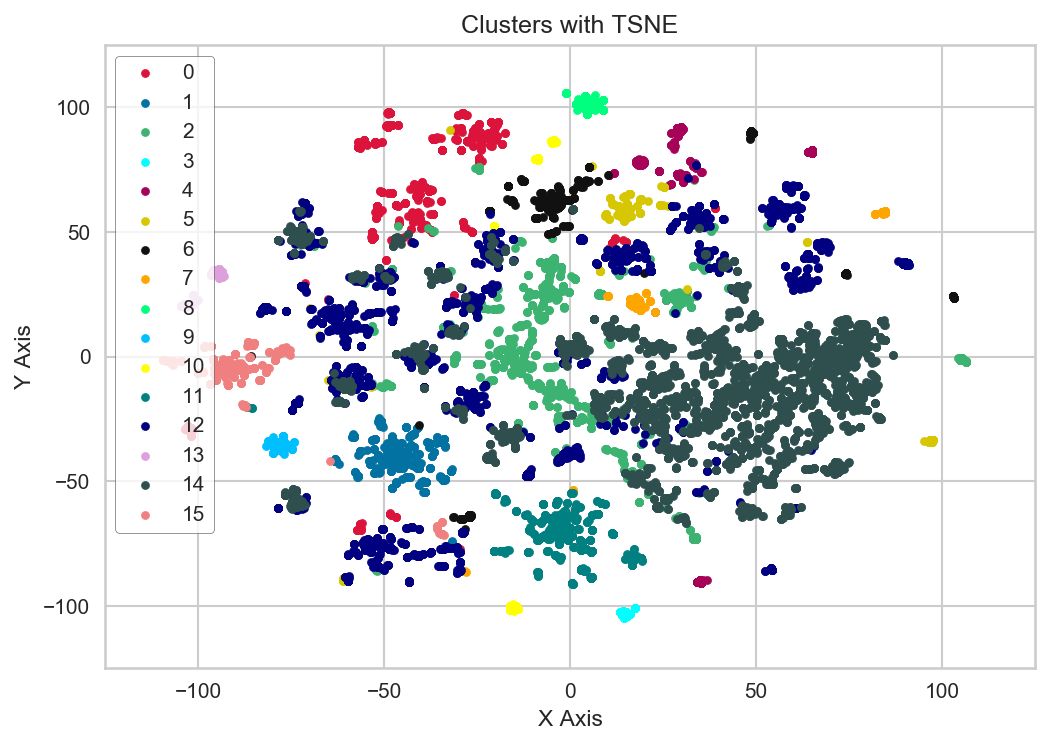

In [46]:
colors = (['crimson','b','mediumseagreen','cyan','m','y', 'k', 'orange', 'springgreen', 'deepskyblue', 'yellow', 'teal', 'navy', 'plum', 'darkslategray', 'lightcoral', 'papayawhip'])
plt.figure(dpi = 150)

for i, c, label in zip (range(16), colors, list(range(16))):
    plt.scatter(low_data[nmf_clusters == i, 0], low_data[nmf_clusters == i, 1], c=c, label = label, s = 15, alpha = 1)

plt.legend(fontsize = 10, loc = 'upper left', frameon = True, facecolor = '#FFFFFF', edgecolor = '#333333');
plt.title("Clusters with TSNE", fontsize = 12);
plt.xlim(-125,125);
plt.ylim(-125,125);
plt.ylabel("Y Axis");
plt.xlabel("X Axis");
plt.yticks(fontsize =10);
plt.xticks(fontsize = 10);
plt.show()

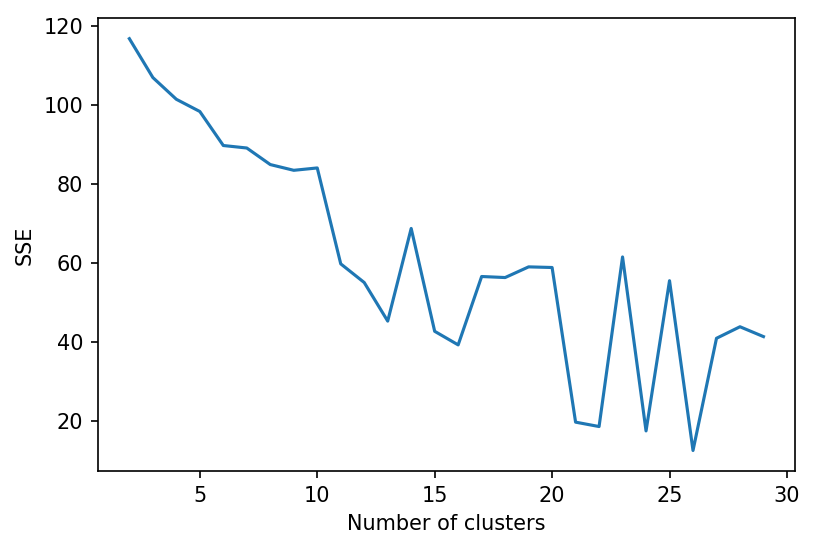

In [33]:
#TFIDF

SSE = []

for k in range(2,30):
    km = MiniBatchKMeans(n_clusters = k, random_state = 42)
    km.fit(nmf_tfidf_data)
    labels = km.labels_
    SSE.append(km.inertia_)
    
plt.figure(dpi = 150)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.plot(range(2,30),SSE);


plt.savefig("cluster_plot_tfidf")

In [52]:
km_tfidf = MiniBatchKMeans(n_clusters=16, random_state = 4444)
nmf_tfidf_clusters2 = km_tfidf.fit_predict(nmf_tfidf_data)

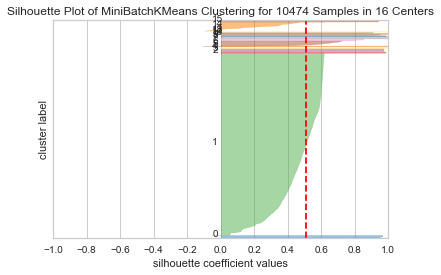

In [23]:
visualiser_tfidf = SilhouetteVisualizer(MiniBatchKMeans(n_clusters=16), random_state = 4444)
visualiser_tfidf.fit(nmf_tfidf_data)
visualiser_tfidf.poof()

In [50]:
model_2 = TSNE(n_components=2, random_state = 0, verbose = 0)
low_data_2 = model_2.fit_transform(nmf_tfidf_data)

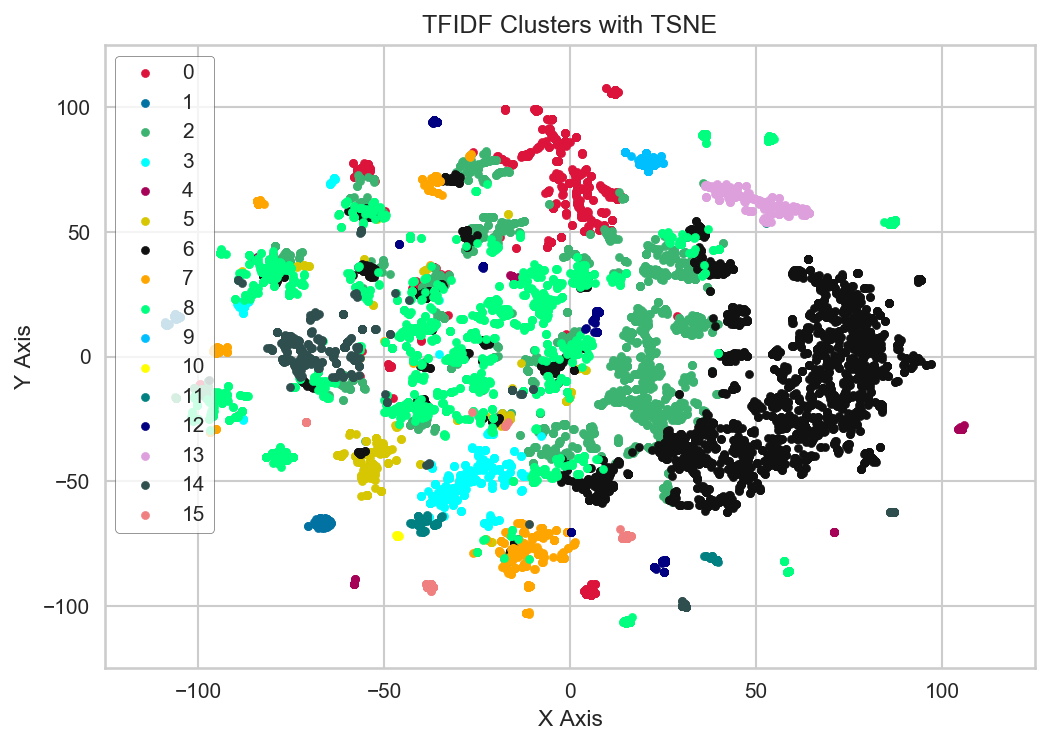

In [54]:
colors = (['crimson','b','mediumseagreen','cyan','m','y', 'k', 'orange', 'springgreen', 'deepskyblue', 'yellow', 'teal', 'navy', 'plum', 'darkslategray', 'lightcoral', 'papayawhip'])

plt.figure(dpi = 150)

for i, c, label in zip (range(16), colors, list(range(16))):
    plt.scatter(low_data_2[nmf_tfidf_clusters2 == i, 0], low_data_2[nmf_tfidf_clusters2 == i, 1], c=c, label = label, s = 15, alpha = 1)

plt.legend(fontsize = 10, loc = 'upper left', frameon = True, facecolor = '#FFFFFF', edgecolor = '#333333');
plt.title("TFIDF Clusters with TSNE", fontsize = 12);
plt.xlim(-125,125);
plt.ylim(-125,125);
plt.ylabel("Y Axis");
plt.xlabel("X Axis");
plt.yticks(fontsize =10);
plt.xticks(fontsize = 10);
plt.show()

In [55]:
with open ('sustainability_clusters_v2.pickle', 'wb') as to_write:
    pickle.dump(nmf_tfidf_clusters2, to_write)